In [2]:
from qutip import *
#QuTiP control modules
import qutip.control.pulseoptim as cpo
import qutip.logging_utils as logging
logger = logging.get_logger()
#Set this to None or logging.WARN for 'quiet' execution
log_level = logging.INFO


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
import h5py

In [3]:
U_targetsFile = h5py.File("U_targets.hdf5", 'r')
#Find a way to do this using rel path to the Results folder 
#rather than copy paste the file to this directory
#Not import rn but do later

U_targets = np.array(U_targetsFile["U_targets"])


# for i in range(U_targets.shape[2]):
#     print(i)
#     print(U_targets[:,:,i])
#     print("===========")

#^ just for my understanding on how the U_targets are stored 


U_target_matrix1 = U_targets[:,:,0]

U_targ_Qobj = Qobj(U_target_matrix1)




C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[ 0.97386906+0.00220554j  0.02694935+0.22244521j -0.03589719+0.00879961j]
 [ 0.02969902+0.22209468j  0.89159271-0.23321263j  0.11587788+0.29502293j]
 [-0.03567618+0.00965991j  0.11931038+0.29365146j  0.82969733-0.45800663j]]

In [3]:

H_drift_matrix = np.array([[0,0,0],
                           [0,0.515916, 0],
                           [0,0,1]])
H_control_matrix = np.array([[0,1/np.sqrt(2), 0],
                             [1/np.sqrt(2),0,0],
                             [0, 1, 0]])

H_drift = Qobj(H_drift_matrix)
H_control = [Qobj(H_control_matrix)] 
 

# Unitary starting point
U_0 = qeye(3)


C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# pulseoptim Method

In [4]:
# Just for now choosing constant time pulses
#also just choosing arbitary values for now

# Number of time slots
n_ts = 10
# Time allowed for the evolution
evo_time = 1


# Fidelity error target
fid_err_targ = 1e-10
# Maximum iterations for the optisation algorithm
max_iter = 200
# Maximum (elapsed) time allowed in seconds
max_wall_time = 120
# Minimum gradient (sum of gradients squared)
# as this tends to 0 -> local minima has been found
min_grad = 1e-20

# pulse type alternatives: RND|ZERO|LIN|SINE|SQUARE|SAW|TRIANGLE|
p_type = 'RND' 

C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:


result = cpo.optimize_pulse_unitary(H_drift, H_control, U_0, U_targ_Qobj, n_ts, evo_time, 
                fid_err_targ=fid_err_targ, min_grad=min_grad, 
                max_iter=max_iter, max_wall_time=max_wall_time, 
                init_pulse_type=p_type, 
                log_level=log_level, gen_stats=True)


C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
INFO:qutip.control.dynamics:Setting memory optimisations for level 0
INFO:qutip.control.dynamics:Internal operator data type choosen to be <class 'numpy.ndarray'>
INFO:qutip.control.dynamics:phased dynamics generator caching True
INFO:qutip.control.dynamics:propagator gradient caching True
INFO:qutip.control.dynamics:eigenvector adjoint caching True
INFO:qutip.control.dynamics:use sparse eigen decomp False
INFO:qutip.control.pulseoptim:System configuration:
Drift Hamiltonian:
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.       0.       0.      ]
 [0.       0.515916 0.    

In [45]:
result.stats.report()
print("Final evolution\n{}\n".format(result.evo_full_final))
print("********* Summary *****************")
print("Final fidelity error {}".format(result.fid_err))
print("Final gradient normal {}".format(result.grad_norm_final))
print("Terminated due to {}".format(result.termination_reason))
print("Number of iterations {}".format(result.num_iter))
print("Completed in {} HH:MM:SS.US".format(
        datetime.timedelta(seconds=result.wall_time)))


------------------------------------
---- Control optimisation stats ----
**** Timings (HH:MM:SS.US) ****
Total wall time elapsed during optimisation: 0:00:00.109680
Wall time computing Hamiltonians: 0:00:00.003673 (3.35%)
Wall time computing propagators: 0:00:00.074633 (68.05%)
Wall time computing forward propagation: 0:00:00.001044 (0.95%)
Wall time computing onward propagation: 0:00:00.000916 (0.84%)
Wall time computing gradient: 0:00:00.005677 (5.18%)

**** Iterations and function calls ****
Number of iterations: 19
Number of fidelity function calls: 36
Number of times fidelity is computed: 36
Number of gradient function calls: 36
Number of times gradients are computed: 36
Number of times timeslot evolution is recomputed: 36

**** Control amplitudes ****
Number of control amplitude updates: 35
Mean number of updates per iteration: 1.8421052631578947
Number of timeslot values changed: 344
Mean number of timeslot changes per update: 9.82857142857143
Number of amplitude values change

C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


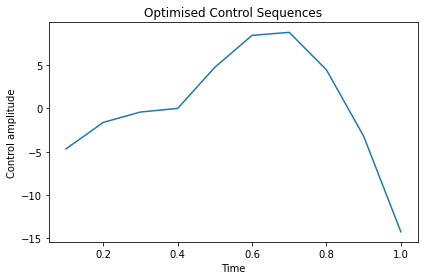

In [62]:
plt.figure()
plt.plot(result.time[1:], result.final_amps[:,0])
plt.title("Optimised Control Sequences")
plt.xlabel("Time")
plt.ylabel("Control amplitude")
# ax1.step(result.time,
#          np.hstack((result.final_amps[:, 0], result.final_amps[-1, 0])),
#          where='post')
plt.tight_layout()
plt.show()

In [8]:
display(U_targ_Qobj)
result.evo_full_final

C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[ 0.98551494+0.00122666j -0.02081607-0.16704989j -0.01987696+0.00497284j]
 [-0.02208201-0.16688723j  0.92515738-0.24297083j -0.08745001-0.22150063j]
 [-0.01980193+0.00526483j -0.08902741-0.22087132j  0.85103647-0.46755434j]]

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[ 0.96495179-0.19798711j -0.07401776-0.14174909j -0.0567307 -0.02965365j]
 [-0.0580482 -0.15323295j  0.81104353-0.50665933j -0.14243061-0.19587831j]
 [-0.02754676-0.04539154j -0.16137272-0.18409816j  0.70642306-0.66197731j]]

In [14]:
result.fidelity  #why is this zero?

C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.0

In [9]:
dir(result)

C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'evo_full_final',
 'evo_full_initial',
 'fid_err',
 'fidelity',
 'final_amps',
 'goal_achieved',
 'grad_norm_final',
 'grad_norm_min_reached',
 'initial_amps',
 'initial_fid_err',
 'max_fid_func_exceeded',
 'max_iter_exceeded',
 'num_fid_func_calls',
 'num_iter',
 'optimizer',
 'reset',
 'stats',
 'termination_reason',
 'time',
 'wall_time',
 'wall_time_limit_exceeded']

# control.grape METHOD

In [21]:
from qutip.control import * 
from qutip.ui.progressbar import TextProgressBar

C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
times = np.linspace(0,1,10)
n_iterations = 100




C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
resultGrape = cy_grape_unitary(U_targ_Qobj, H_drift, H_control, n_iterations, times, eps=2*np.pi/times[-1], phase_sensitive=False,
                          progress_bar=TextProgressBar())


C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10.0%. Run time:   0.46s. Est. time left: 00:00:00:04
20.0%. Run time:   0.72s. Est. time left: 00:00:00:02
30.0%. Run time:   1.00s. Est. time left: 00:00:00:02
40.0%. Run time:   1.30s. Est. time left: 00:00:00:01
50.0%. Run time:   1.63s. Est. time left: 00:00:00:01
60.0%. Run time:   1.90s. Est. time left: 00:00:00:01
70.0%. Run time:   2.17s. Est. time left: 00:00:00:00
80.0%. Run time:   2.43s. Est. time left: 00:00:00:00
90.0%. Run time:   2.72s. Est. time left: 00:00:00:00
Total run time:   3.09s


In [26]:
dir(resultGrape)

C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['H_t',
 'U_f',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'u']

In [35]:

resultGrape.u.shape


C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100, 1, 10)

In [32]:
display(U_targ_Qobj)
display(result.evo_full_final)
display(resultGrape.U_f)





C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[ 0.98551494+0.00122666j -0.02081607-0.16704989j -0.01987696+0.00497284j]
 [-0.02208201-0.16688723j  0.92515738-0.24297083j -0.08745001-0.22150063j]
 [-0.01980193+0.00526483j -0.08902741-0.22087132j  0.85103647-0.46755434j]]

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[ 0.96495179-0.19798711j -0.07401776-0.14174909j -0.0567307 -0.02965365j]
 [-0.0580482 -0.15323295j  0.81104353-0.50665933j -0.14243061-0.19587831j]
 [-0.02754676-0.04539154j -0.16137272-0.18409816j  0.70642306-0.66197731j]]

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[ 0.94441379+0.00835595j -0.09442019-0.31479772j  0.        +0.j        ]
 [-0.07316916-0.32040451j  0.81736776-0.47317773j  0.        +0.j        ]
 [-0.07115839+0.03357048j -0.31076018-0.34660537j  0.54030231-0.84147098j]]

In [52]:
display(result.final_amps)
display(result.time)

C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-4.66525828e+00],
       [-1.61388063e+00],
       [-4.13975217e-01],
       [ 2.01060574e-03],
       [ 4.75164385e+00],
       [ 8.43961993e+00],
       [ 8.78362839e+00],
       [ 4.45243443e+00],
       [-3.20636350e+00],
       [-1.42505533e+01]])

array([0.        , 0.1       , 0.2       , 0.3       , 0.40000001,
       0.50000001, 0.60000001, 0.70000001, 0.80000001, 0.90000001,
       1.00000001])

In [63]:
from qutip.control.grape import plot_grape_control_fields, _overlap
display(abs(_overlap(U_targ_Qobj,result.evo_full_final)))
display(abs(_overlap(U_targ_Qobj,resultGrape.U_f))) 


C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9967536750454057

0.9888206764090297

C:\Users\waqas\Anaconda3\envs\qutip-env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(<Figure size 576x144 with 1 Axes>,
 array([[<AxesSubplot:xlabel='$t$', ylabel='Control field Amplitude'>]],
       dtype=object))

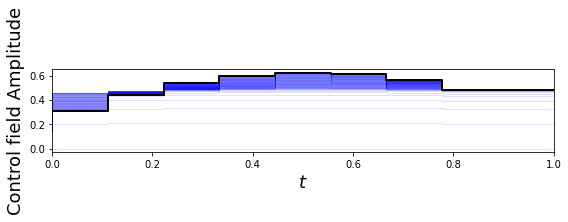

In [71]:

#plot_grape_control_fields(result.time, result.final_amps, ['Control Field Amplitude'])
plot_grape_control_fields(times, resultGrape.u, ['Control field Amplitude'])
